<a href="https://colab.research.google.com/github/mickey2798/MultiClassClassificationVideoken/blob/master/MultiClassClassification_Videoken.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Step 1 - *Mounting the Drive to the Colab and Downloading the given Data.*





In [ ]:
import os
os.chdir('/content/drive/My Drive/Videoken')

In [ ]:
!ls

best_model.h5  frame-dataset  output  Videoken_73.h5


In [ ]:
!wget https://videokenoffshore.blob.core.windows.net/com-videoken-deployment/com.videoken//frame-dataset.tar.gz


--2020-08-21 03:45:36--  https://videokenoffshore.blob.core.windows.net/com-videoken-deployment/com.videoken//frame-dataset.tar.gz
Resolving videokenoffshore.blob.core.windows.net (videokenoffshore.blob.core.windows.net)... 52.191.176.36
Connecting to videokenoffshore.blob.core.windows.net (videokenoffshore.blob.core.windows.net)|52.191.176.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5877934528 (5.5G) [application/octet-stream]
Saving to: ‘frame-dataset.tar.gz’

frame-dataset.tar.g 100%[===================>]   5.47G  16.4MB/s    in 6m 16s  

2020-08-21 03:51:53 (14.9 MB/s) - ‘frame-dataset.tar.gz’ saved [5877934528/5877934528]



#**Step-2 Unzipping the whole folder**

In [ ]:
! tar -xvf "frame-dataset.tar.gz"

Streaming output truncated to the last 5000 lines.
frame-dataset/slides/3aYYrzl3xzk_key_frame_3_0.png
frame-dataset/slides/abfiU1DAjj0_key_frame_5_0.png
frame-dataset/slides/vdocipher-8f31b10e49e8470daa06aa9797fe4675_key_frame_35_0.png
frame-dataset/slides/w8rLW6magqs_key_frame_63_0.png
frame-dataset/slides/X2s9GXXhmCY_key_frame_0_0.png
frame-dataset/slides/LZUKHhwtpFU_key_frame_43_0.png
frame-dataset/slides/6ZJzfRdCZjc_key_frame_82_1.png
frame-dataset/slides/vtxwXSGl9V8_key_frame_20_0.png
frame-dataset/slides/b3pcKr_vSyk_key_frame_48_0.png
frame-dataset/slides/BHKpsgL789I_key_frame_128_0.png
frame-dataset/slides/b3pcKr_vSyk_key_frame_5_12.png
frame-dataset/slides/DF-CBYioA_c_key_frame_156_0.png
frame-dataset/slides/D1m2K-zybf0_key_frame_44_0.png
frame-dataset/slides/0sApcfs0gBg_key_frame_2_0.png
frame-dataset/slides/UFCG_rCNDuE_key_frame_65_0.png
frame-dataset/slides/1M9B2I01X_k_key_frame_543_1.png
frame-dataset/slides/-RD53zPzII4_key_frame_0_0.png
frame-dataset/slides/1DJoi7N5TvI_key

In [ ]:
! ls

In [ ]:
!pip install split-folders

#Step-3 Splitting the data into 3 different types in ratio(80, 10, 10)
       

#1.   Training Data
#2.   Validation Data
#3.   Test Data



In [ ]:
import splitfolders  # or import split_folders
splitfolders.ratio("frame-dataset", output="output", seed=1337, ratio=(.8, .1, .1), group_prefix=None) # default values


Copying files: 20716 files [06:33, 52.63 files/s]


#Step-4 Importing all the Necessary libraries

In [ ]:
import cv2
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

#Step 5 - Performing some data augmentations

In [ ]:

image_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True)

In [ ]:
train_datagen = image_datagen.flow_from_directory('output/train/', target_size=(256,256),batch_size=128,class_mode='categorical')
val_datagen = image_datagen.flow_from_directory('output/val/',target_size=(256,256),batch_size=128,class_mode='categorical')

Found 16572 images belonging to 4 classes.
Found 2069 images belonging to 4 classes.


#Step 6- Custom Layers in which have included all the Convolution layers, MaxPool layers, Dense Layer, BatchNormalization, Dropout accordingly.




In [ ]:
from keras.optimizers import SGD, RMSprop, Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, LeakyReLU


model = Sequential()



# block 1
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256,256, 3)))
model.add(MaxPooling2D((2, 2)))

# block 2
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
# block 3
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

# block 4
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))




model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])



#The Overall summary of the Custom Model.





In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 128)      

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

#Step 7- And the last Step of modeling, fitting the data in our custom built model. 
#Have also performed some helpful steps. Such as EarlyStopping, ModelCheckpoint and ReduceLROn Plateau. 

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=0.5,  patience=2, min_lr=1e-5, verbose=1)


# fit model


results = model.fit_generator(train_datagen,epochs=100,
                              validation_data=val_datagen,
                             callbacks=[es, mc, lrr])

Epoch 1/100
130/130 [==============================] - ETA: 0s - loss: 1.3255 - accuracy: 0.4655 
Epoch 00001: val_accuracy improved from -inf to 0.46979, saving model to best_model.h5
130/130 [==============================] - 3801s 29s/step - loss: 1.3255 - accuracy: 0.4655 - val_loss: 1.2056 - val_accuracy: 0.4698
Epoch 2/100
130/130 [==============================] - ETA: 0s - loss: 1.0430 - accuracy: 0.5708
Epoch 00002: val_accuracy improved from 0.46979 to 0.55486, saving model to best_model.h5
130/130 [==============================] - 484s 4s/step - loss: 1.0430 - accuracy: 0.5708 - val_loss: 1.0176 - val_accuracy: 0.5549
Epoch 3/100
130/130 [==============================] - ETA: 0s - loss: 0.9081 - accuracy: 0.6242
Epoch 00003: val_accuracy improved from 0.55486 to 0.62687, saving model to best_model.h5
130/130 [==============================] - 466s 4s/step - loss: 0.9081 - accuracy: 0.6242 - val_loss: 0.8835 - val_accuracy: 0.6269
Epoch 4/100
130/130 [======================

# Step -8 Graphing our training, validation accuracy and loss




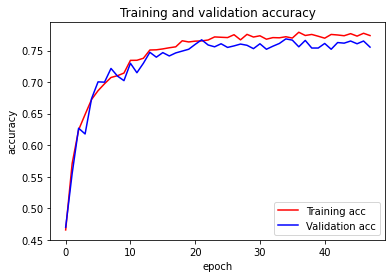

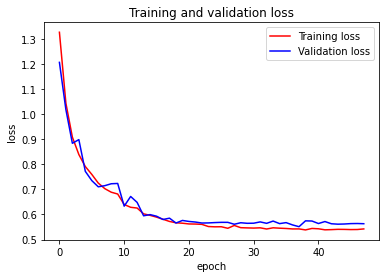

In [ ]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()


In [ ]:
test_datagen = image_datagen.flow_from_directory('output/test',target_size=(256,256),batch_size=1, shuffle = False, class_mode='categorical',
    subset=None)

Found 2075 images belonging to 4 classes.


# Evaluate performance on train & test datasets

In [ ]:

loss, acc = model.evaluate_generator(train_datagen, steps=len(train_datagen)//128, verbose=1, workers=3)
print('Training data  -> loss: %.3f, acc: %.3f' % (loss, acc))

loss, acc = model.evaluate_generator(test_datagen, steps=len(test_datagen), verbose=1, workers=3)
print('Testing data   -> loss: %.3f, acc: %.3f' % (loss, acc))

Instructions for updating:
Please use Model.evaluate, which supports generators.
1/1 [==============================] - 0s 13ms/step - loss: 0.6247 - accuracy: 0.7266
Training data  -> loss: 0.625, acc: 0.727
2075/2075 [==============================] - 164s 79ms/step - loss: 0.5537 - accuracy: 0.7619
Testing data   -> loss: 0.554, acc: 0.762


# The Classification Report, that tells everything related to evaluation starting from Precision, Recall F1-Score etc. 

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
# batch_size = 1
# num_of_test_samples = 2069
predictions = model.predict_generator(test_datagen,  len(test_datagen))

y_pred = np.argmax(predictions, axis=1)

true_classes = test_datagen.classes

class_labels = list(test_datagen.class_indices.keys())   

print(class_labels)

print(confusion_matrix(test_datagen.classes, y_pred))

report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report)

Instructions for updating:
Please use Model.predict, which supports generators.
['codewalk', 'handwritten', 'misc', 'slides']
[[362   6  18  35]
 [ 10 500 108  16]
 [ 23  86 274  72]
 [ 17  23  65 460]]
              precision    recall  f1-score   support

    codewalk       0.88      0.86      0.87       421
 handwritten       0.81      0.79      0.80       634
        misc       0.59      0.60      0.60       455
      slides       0.79      0.81      0.80       565

    accuracy                           0.77      2075
   macro avg       0.77      0.77      0.77      2075
weighted avg       0.77      0.77      0.77      2075



#Defining function for confusion matrix plot

In [ ]:

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

#Plotting non-normalized confusion matrix

Confusion matrix, without normalization


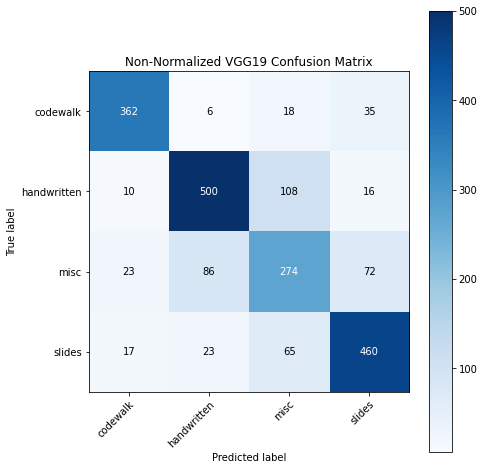

In [ ]:
plot_confusion_matrix(true_classes, y_pred, classes = class_labels,  title = 'Non-Normalized VGG19 Confusion Matrix')


#Plotting normalized confusion matrix

Normalized confusion matrix


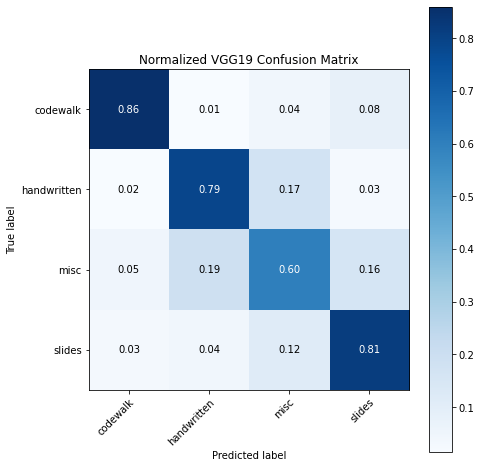

In [ ]:
plot_confusion_matrix(true_classes, y_pred, classes = class_labels, normalize=True,  title = 'Normalized VGG19 Confusion Matrix')
